# Lab: EDA in Sagemaker

---

This notebook should be ran as a AWS Sagemaker notebook. Make sure that `seaborn` package is upgraded to it's latest version.

In [ ]:
! pip install --upgrade seaborn


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
%matplotlib inline

## Loading data

We are going to use pandas to load dataset from a public URL (`http://bit.ly/2U18s5V`).

The URL contains a Titanic survival dataset, which is a CSV formated and can be loaded with pandas in the same way as local file.

In [ ]:
import pandas as pd
df = pd.read_csv('http://bit.ly/2U18s5V')

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


What is the number of columns and rows in this dataset?

In [ ]:
df.shape

(887, 8)

What are the columns in this dataset?

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Rename the following columns:
- `Siblings/Spouses Aboard` to `SibSp`
- `Parents/Children Aboard`to `Parch`


In [ ]:
df = df.rename(columns={
    'Siblings/Spouses Aboard': 'SibS',
    'Parents/Children Aboard': 'Parch'
})

df.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibS', 'Parch', 'Fare'], dtype='object')

Setup seaborn style to `whitegrid`

In [ ]:
import seaborn as sns

sns.set()
sns.set_style('whitegrid')

Build a histogram of `Fare` distribution. Use 20 bins and make the histogram green.

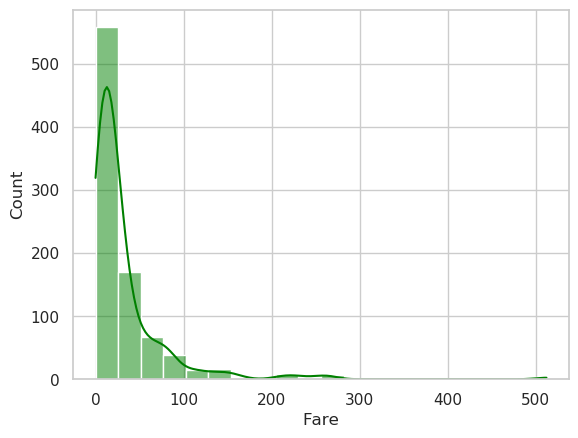

In [ ]:
sns.histplot(df['Fare'], color='green', kde=True, bins=20)

Create a boxplot for `Fare`. Orient it horizontally.

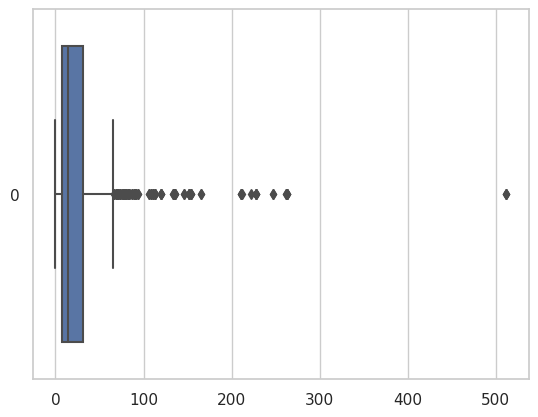

In [ ]:
sns.boxplot(df['Fare'], orient='h')

Find the names of the passanges who paid over 500 pounds for fare.

In [ ]:
df[df.Fare > 500]

,Survived,Pclass,Name,Sex,Age,SibS,Parch,Fare
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292
676,1,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
733,1,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292


Build a `catplot` with `Survided` on x-axis and `Fare` on y-axis. Use `Pclass` as color label.

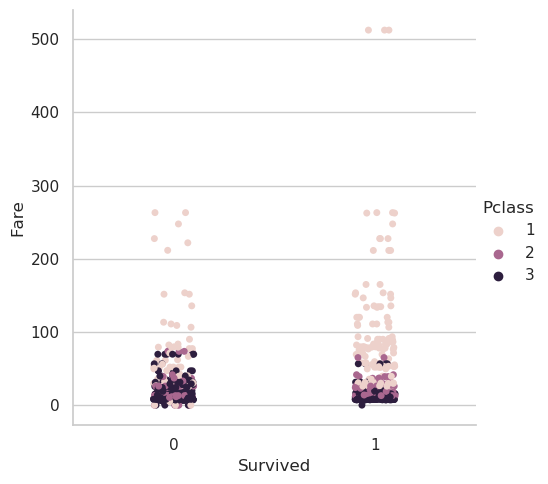

In [ ]:
sns.catplot(
    data=df,
    x='Survived',
    y='Fare',
    hue='Pclass'
)

Create a new dataframes with the following columns:
`['Survived', 'Pclass', 'Sex', 'Age', 'Fare']`

In [ ]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
ndf = df[cols].copy()


Create a pairplot using `Survived` as a color label.

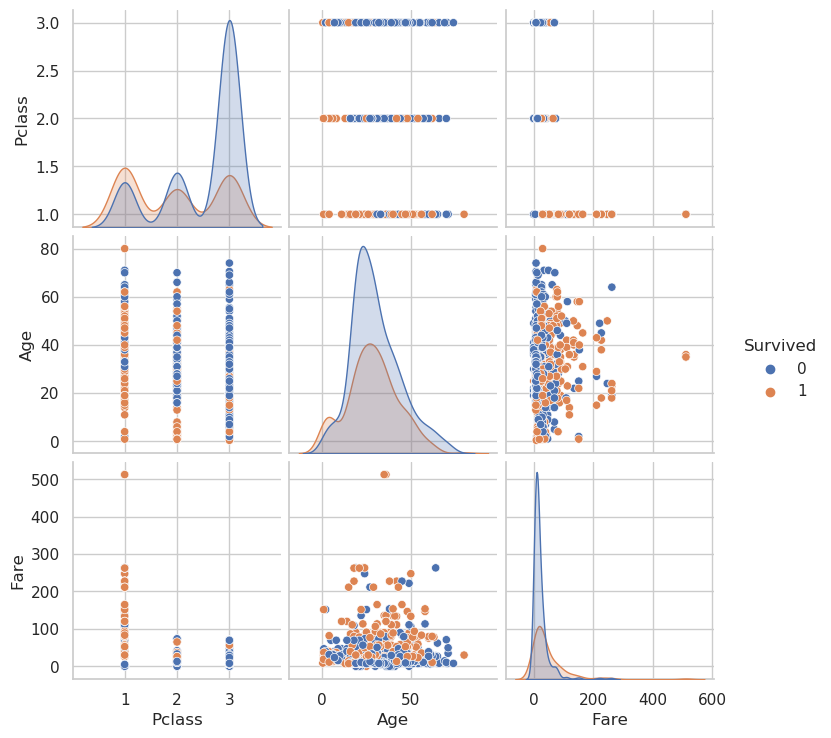

In [ ]:
sns.pairplot(
    data=ndf,
    hue='Survived'
)

Discuss the following:
- Pclass / Pclass histogram
- Age over Pclass plot

Find the names of people over 70 years old.

In [ ]:
df[df.Age > 70]

,Survived,Pclass,Name,Sex,Age,SibS,Parch,Fare
95,0,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,0,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
490,0,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
627,1,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,0,3,Mr. Johan Svensson,male,74.0,0,0,7.7750
